In [110]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [173]:
df = pd.read_csv(r'datasets/aug_train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [182]:
for i in list(df.columns):
    print(f"{i} - {len(df[i].unique())}")

id - 382154
Gender - 2
Age - 66
Driving_License - 2
Region_Code - 53
Previously_Insured - 2
Vehicle_Age - 3
Vehicle_Damage - 2
Annual_Premium - 48993
Policy_Sales_Channel - 156
Vintage - 290
Response - 2


In [163]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [254]:
# df = df.drop(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], axis=1)
continuous_df = df[["Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]]
continuous_df.head()

,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,7.0,2630.0,152.0,16
1,28.0,43327.0,26.0,135
2,33.0,35841.0,124.0,253
3,33.0,27645.0,152.0,69
4,46.0,29023.0,152.0,211


In [259]:
# X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
# print(X.shape)
# X = X[:, ::-1]
X = continuous_df.to_numpy()
print(X)
print(continuous_df.shape)

[[7.0000e+00 2.6300e+03 1.5200e+02 1.6000e+01]
 [2.8000e+01 4.3327e+04 2.6000e+01 1.3500e+02]
 [3.3000e+01 3.5841e+04 1.2400e+02 2.5300e+02]
 ...
 [2.8000e+01 4.0443e+04 2.6000e+01 1.8700e+02]
 [2.8000e+01 2.5380e+04 1.5200e+02 2.0800e+02]
 [1.8000e+01 3.0396e+04 1.5200e+02 1.0400e+02]]
(382154, 4)


111247795788413.7
51174711650192.82
25796324428747.195
17097386832928.38
11067383115417.0
7496222360747.75
5477618613053.256
4216628608841.622
3388141392957.235
2675475563704.7065


Text(0.5, 1.0, 'The elbow method showing the optimal k')

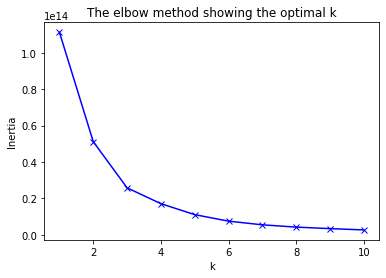

In [206]:
inertias = []
silhouette_scores = []
K = 10 
for k in range(1, K+1):
    kmm = KMeans(n_clusters=k).fit(X)
    kmm.fit(X)
    cluster_labels = kmm.labels_
    inertia = kmm.inertia_
    print(inertia)
    inertias.append(inertia)
# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

In [207]:
from kneed import KneeLocator

sensitivity = range(10)
elbows = set()

for s in sensitivity:
    kneedle = KneeLocator(range(1, K+1), inertias, curve="convex", direction="decreasing", S=s, interp_method="interp1d")
    print(s, kneedle.elbow)
    elbows.add(kneedle.elbow)
elbows = list(filter(None, elbows))
print(elbows)

0 3
1 3
2 3
3 3
4 3
5 3
6 None
7 None
8 None
9 None
[3]


/Users/Vishvig/Desktop/Education/UoB/.uob/envs/data_analytics/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


Text(0.5, 1.0, 'The elbow method showing the optimal k')

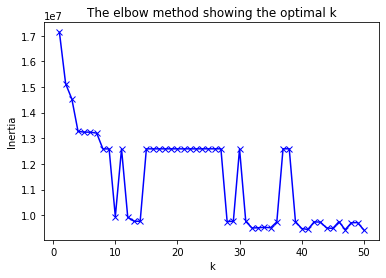

In [241]:
bics = []
K = 50 
for k in range(1, K+1):
    gmm = GMM(n_components = k, covariance_type='full')
    gmm.fit(X)
    bic = gmm.bic(X)
    bics.append(bic)
# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), bics, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

In [244]:
print(bics.index(min(bics)))

49


In [260]:
optimal_k = 4
gmm = GMM(n_components = optimal_k, covariance_type='full').fit(X)

In [261]:
Xnew = gmm.sample(100000)
Xnew[0][:,0]

array([15.55598464, 21.72535117, 28.63347684, ..., 25.67588682,
       30.04092615, 29.56666345])

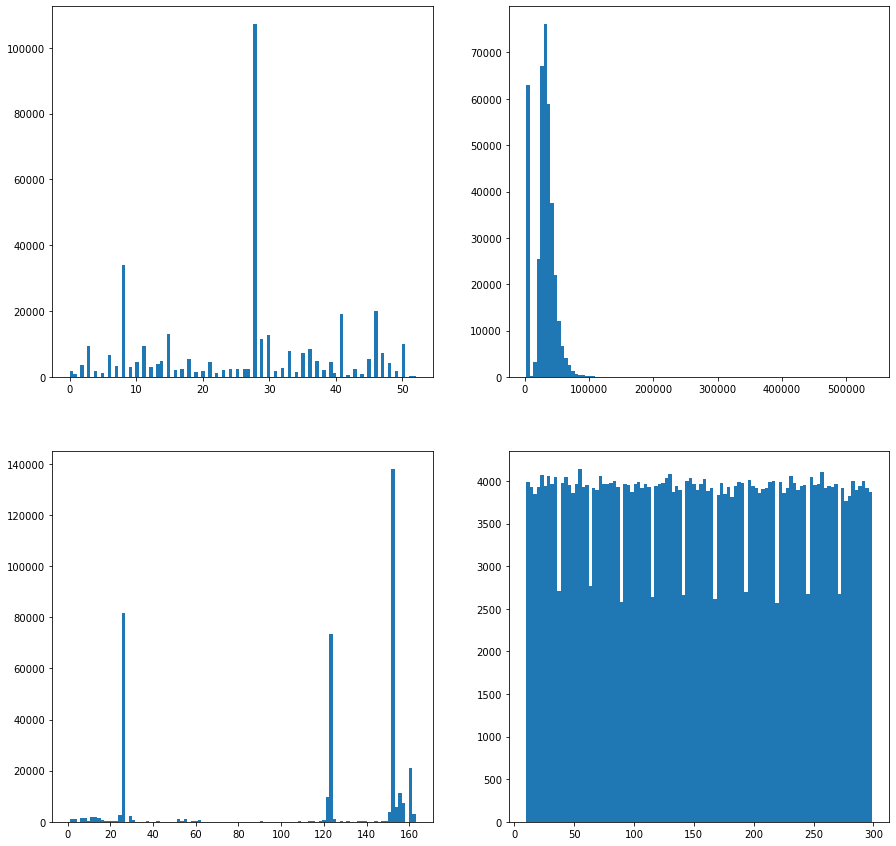

In [262]:
# plotting the distribution of the features using histogram

len_continuous = X.shape[1]

fig_rows = int(len_continuous/2) if len_continuous % 2 == 0 else int(len_continuous/2 + 1)
fig_columns = 2
bins = 100

fig,ax = plt.subplots(fig_rows, fig_columns, figsize=(15,15))
for feature in range(len_continuous):
    row_num = int(feature/fig_columns)
    col_num = feature%fig_columns
    if len(ax.shape) > 1:
        ax[row_num, col_num].hist(X[:, feature], bins=bins)
#         ax[row_num, col_num].title.set_text(feature.upper())
    else:
        ax[col_num].hist(X[:, feature], bins=bins)
#         ax[col_num].title.set_text(feature.upper())

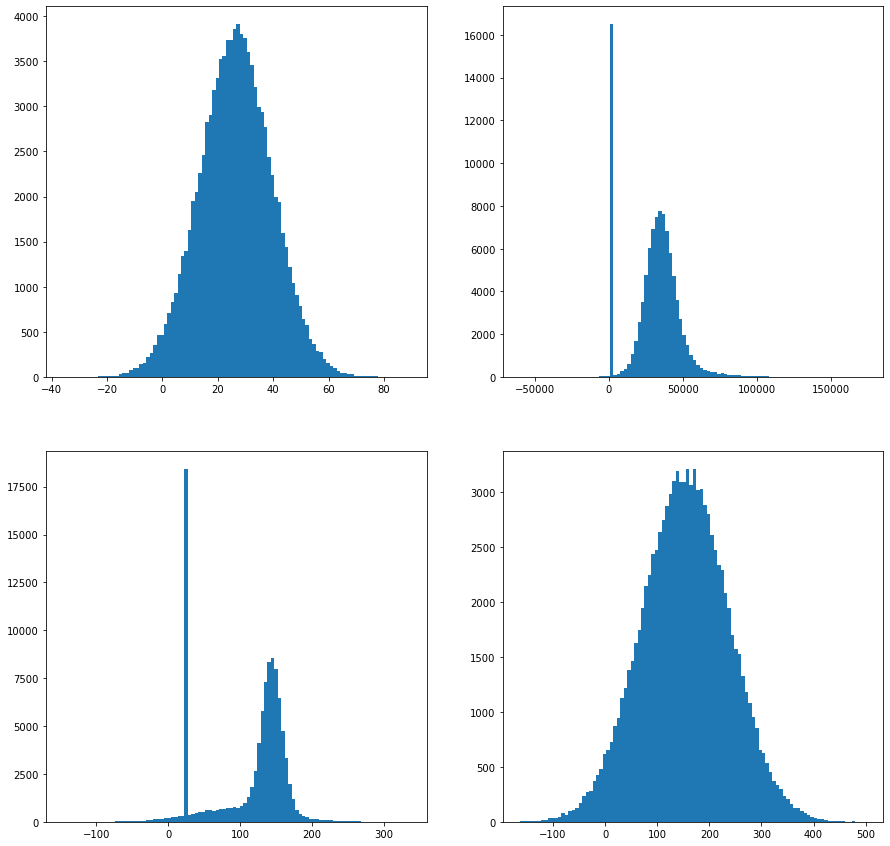

In [263]:
# plotting the distribution of the features using histogram

len_continuous = Xnew[0].shape[1]

fig_rows = int(len_continuous/2) if len_continuous % 2 == 0 else int(len_continuous/2 + 1)
fig_columns = 2
bins = 100

fig,ax = plt.subplots(fig_rows, fig_columns, figsize=(15,15))
for feature in range(len_continuous):
    row_num = int(feature/fig_columns)
    col_num = feature%fig_columns
    if len(ax.shape) > 1:
        ax[row_num, col_num].hist(Xnew[0][:, feature], bins=bins)
#         ax[row_num, col_num].title.set_text(feature.upper())
    else:
        ax[col_num].hist(Xnew[0][:, feature], bins=bins)
#         ax[col_num].title.set_text(feature.upper())

In [237]:
# Log clustering metric

X_merged = np.concatenate((X, Xnew[0]), axis=0)
Na = X.shape[0]
Nb = Xnew[0].shape[0]
clusterer = KMeans(n_clusters=3).fit(X_merged) 
merged_labels = clusterer.fit_predict(X_merged)
c = Na/(Na + Nb)

unique_m, counts_m = np.unique(merged_labels, return_counts=True)
unique_o, counts_o = np.unique(merged_labels[0:Na], return_counts=True)

_sum = 0

for _index, i in enumerate(unique_m):
    _sum += ((counts_m[_index]/counts_o[_index]) - c) ** 2
print(len(unique_m))
print(_sum/len(unique_m))
print(math.log(_sum/len(unique_m)))

3
0.2609025493705636
-1.3436083154400362


In [264]:
print(gmm.means_)
# print(gmm.weights_)
print(gmm.covariances_)
# print(gmm.bic(X))

[[2.67811806e+01 3.89022036e+04 2.60000000e+01 1.54276794e+02]
 [2.62411470e+01 2.63000000e+03 1.13829598e+02 1.54870856e+02]
 [2.61777007e+01 3.37779716e+04 1.44125784e+02 1.53957921e+02]
 [2.77234815e+01 4.97439390e+04 6.25200178e+01 1.54289707e+02]]
[[[ 1.19610437e+02 -4.50848388e+03 -3.68579466e-28 -1.05736821e+00]
  [-4.50848388e+03  1.38645645e+08 -3.89019514e-25 -4.95235987e+02]
  [-3.68800788e-28 -3.88950927e-25  1.00000000e-06 -1.42798862e-27]
  [-1.05736821e+00 -4.95235987e+02 -1.42580160e-27  7.01297259e+03]]

 [[ 2.15577014e+02  1.84607412e-24 -1.58989387e+01 -5.05461057e+00]
  [ 1.84573658e-24  1.00000000e-06  8.50339682e-24  1.21980558e-23]
  [-1.58989387e+01  8.49889743e-24  3.06571503e+03  7.03348233e+00]
  [-5.05461057e+00  1.21961876e-23  7.03348233e+00  7.00597958e+03]]

 [[ 1.81373018e+02 -1.36873096e+03 -6.69489756e+00  7.71757279e-01]
  [-1.36873096e+03  7.39195001e+07 -1.98130307e+04  3.06682440e+03]
  [-6.69489756e+00 -1.98130307e+04  1.89847854e+02  2.00331605e